## `Pastikan klik 'File > Save a copy in Drive' sebelum memulai pengerjaan`

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings("ignore")
from pandas.tseries.offsets import BDay

## Muhammad Zainurrahman(python project)

# Business and Data Understanding

#Dataset

Data yang digunakan adalah data yang berasal dari Tokopedia (***bukan data sesungguhnya***). Mengenai penjelasan dataset adalah sebagai berikut:

|variable                       |class     |description |
|:------------------------------|:---------|:-----------|
**order_detail:**
id 			|object| angka unik dari order / id_order
customer_id 		|object|angka unik dari pelanggan
order_date 		|object| tanggal saat dilakukan transaksi
sku_id 			|object| angka unik dari produk (sku adalah stock keeping unit)
price			|int64| harga yang tertera pada tagging harga
qty_ordered 		|int64| jumlah barang yang dibeli oleh pelanggan
before_discount	|float64| nilai harga total dari produk (price * qty_ordered)
discount_amount	|float64| nilai diskon product total
after_discount		|float64| nilai harga total produk ketika sudah dikurangi dengan diskon
is_gross 		|int64| menunjukkan pelanggan belum membayar pesanan
is_valid		|int64| menunjukkan pelanggan sudah melakukan pembayaran
is_net			|int64| menunjukkan transaksi sudah selesai
payment_id 		|int64| angka unik dari metode pembayaran
||
**sku_detail:**
id |object| angka unik dari produk (dapat digunakan untuk key saat join)
sku_name 		|object| nama dari produk
base_price		|float64| harga barang yang tertera pada tagging harga / price
cogs 			|int64| cost of goods sold / total biaya untuk menjual 1 produk
category		|object| kategori produk
||
**customer_detail:**
id 			|object| angka unik dari pelanggan
registered_date	|object| tanggal pelanggan mulai mendaftarkan diri sebagai anggota
||
**payment_detail:**
id			|int64| angka unik dari metode pembayaran
payment_method	|object| metode pembayaran yang digunakan


| Variable          | Class    | Description                                               |
|:------------------|:---------|:----------------------------------------------------------|
**order_detail:**
id                 |object   | unique number of the order / id_order
customer_id        |object   | unique number of the customer
order_date         |object   | date when the transaction took place
sku_id             |object   | unique number of the product (sku is stock keeping unit)
price              |int64    | price listed on the price tag
qty_ordered        |int64    | quantity of items purchased by the customer
before_discount    |float64  | total price value of the products (price * qty_ordered)
discount_amount    |float64  | total discount value of the products
after_discount     |float64  | total price value of the products after applying the discount
is_gross           |int64    | indicates the customer has not paid for the order
is_valid           |int64    | indicates the customer has made the payment
is_net             |int64    | indicates the transaction is completed
payment_id         |int64    | unique number of the payment method
||
**sku_detail:**
id                 |object   | unique number of the product (can be used as key during join)
sku_name           |object   | name of the product
base_price         |float64  | retail price of the product listed on the price tag
cogs               |int64    | cost of goods sold / total cost to sell 1 product
category           |object   | product category
||
**customer_detail:**
id                 |object   | unique number of the customer
registered_date    |object   | date when the customer started registering as a member
||
**payment_detail:**
id                 |int64    | unique number of the payment method
payment_method     |object   | payment method used by the customer

## Skema tabel
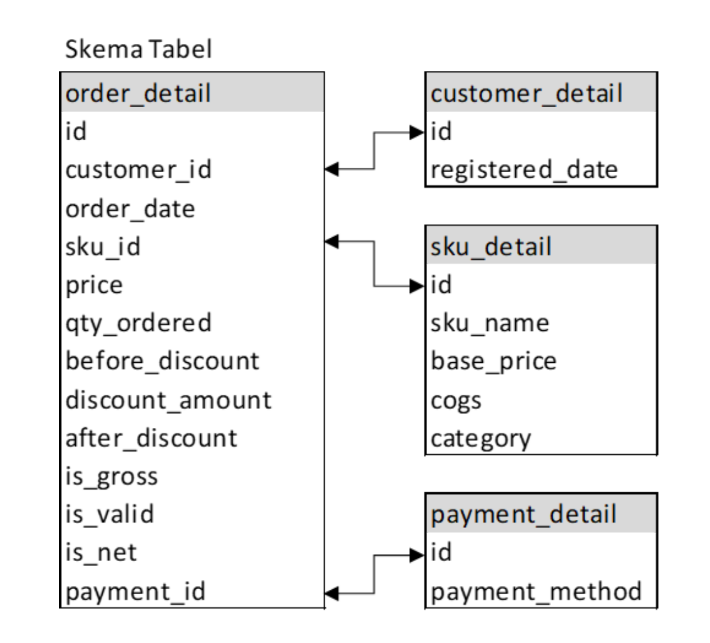

In [35]:
#Sumber data yang digunakan
path_od = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/order_detail.csv"
path_pd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/payment_detail.csv"
path_cd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/customer_detail.csv"
path_sd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/sku_detail.csv"
df_od = pd.read_csv(path_od)
df_pd = pd.read_csv(path_pd)
df_cd = pd.read_csv(path_cd)
df_sd = pd.read_csv(path_sd)

In [36]:
#Mengampilkan 5 baris pertama
df_od.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000.0,2610000.00,2610000.00,1,1,0,5
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710.0,2464927.50,7394782.50,1,0,0,5
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000.0,2065344.62,5416655.38,1,0,0,4
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680.0,1455440.40,2138239.60,1,1,1,5
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220.0,1059172.80,3354047.20,1,1,1,4


In [37]:
#Mengampilkan 5 baris pertama
df_pd.head()

,id,payment_method
0,1,cod
1,2,jazzvoucher
2,3,customercredit
3,4,Payaxis
4,5,jazzwallet


In [38]:

#Mengampilkan 5 baris pertama
df_cd.head()

,id,registered_date
0,C996508L,2021-07-10
1,C180415L,2021-07-18
2,C535451L,2021-07-23
3,C177843L,2021-07-12
4,C951682L,2021-07-27


In [39]:
#Mengampilkan 5 baris pertama
df_sd.head()

,id,sku_name,base_price,cogs,category
0,P798444,AT-FSM-35,57631.70,46052,Kids & Baby
1,P938347,AYS_Haier-18HNF,3931789.26,3499256,Appliances
2,P826364,Atalian _DV206A-Brown-41,324597.00,243426,Men Fashion
3,P467533,Darul_Sakoon_Food_Bundle,2870.42,2378,Superstore
4,P229955,HP_15AY-15-Ay072NIA-ci3,2265625.00,1631250,Computing


In [40]:
#menggabungkan dataframe
df_od_pd = pd.merge(left = df_od, right = df_pd, how = 'left', left_on = 'payment_id', right_on = 'id', suffixes = ('', '_payment'))
df_od_pd_cd = pd.merge(left = df_od_pd, right = df_cd, how = 'left', left_on = 'customer_id', right_on = 'id', suffixes = ('','_customer'))
df_od_pd_cd_sd = pd.merge(left = df_od_pd_cd, right = df_sd, how = 'left', left_on = 'sku_id', right_on = 'id',suffixes=('','_sku'))
df = df_od_pd_cd_sd
df.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,...,payment_id,id_payment,payment_method,id_customer,registered_date,id_sku,sku_name,base_price,cogs,category
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000.0,2610000.00,2610000.00,1,...,5,5,jazzwallet,C713589L,2021-07-07,P858068,RB_Dettol Germ Busting Kit-bf,26100.0,18270,Others
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710.0,2464927.50,7394782.50,1,...,5,5,jazzwallet,C551551L,2021-11-20,P886455,PS4_Slim-500GB,1971942.0,1321182,Entertainment
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000.0,2065344.62,5416655.38,1,...,4,4,Payaxis,C685596L,2021-11-19,P678648,Changhong Ruba 55 Inches UD55D6000i Ultra HD T...,7482000.0,5162580,Entertainment
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680.0,1455440.40,2138239.60,1,...,5,5,jazzwallet,C830683L,2021-11-03,P540013,dawlance_Inverter 30,3593680.0,3054628,Appliances
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220.0,1059172.80,3354047.20,1,...,4,4,Payaxis,C191766L,2021-07-05,P491032,Dawlance_Inverter-45 2.0 ton,4413220.0,3177472,Appliances


# Data Cleaning

In [41]:
#bersihkan kolom yang tidak terpakai
df.drop(columns = ['id_payment','id_sku','id_customer'], inplace = True)
df

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id,payment_method,registered_date,sku_name,base_price,cogs,category
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000.0,2610000.00,2610000.00,1,1,0,5,jazzwallet,2021-07-07,RB_Dettol Germ Busting Kit-bf,26100.0,18270,Others
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710.0,2464927.50,7394782.50,1,0,0,5,jazzwallet,2021-11-20,PS4_Slim-500GB,1971942.0,1321182,Entertainment
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000.0,2065344.62,5416655.38,1,0,0,4,Payaxis,2021-11-19,Changhong Ruba 55 Inches UD55D6000i Ultra HD T...,7482000.0,5162580,Entertainment
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680.0,1455440.40,2138239.60,1,1,1,5,jazzwallet,2021-11-03,dawlance_Inverter 30,3593680.0,3054628,Appliances
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220.0,1059172.80,3354047.20,1,1,1,4,Payaxis,2021-07-05,Dawlance_Inverter-45 2.0 ton,4413220.0,3177472,Appliances
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5879,ODR4312238651y,C295679L,2022-07-29,P194155,0,2,0.0,0.00,0.00,1,1,0,1,cod,2022-07-23,Bahr-e-Shifa,0.0,0,Books
5880,ODR3930118778w,C368658L,2022-09-06,P194155,0,1,0.0,0.00,0.00,1,1,1,1,cod,2022-05-19,Bahr-e-Shifa,0.0,0,Books
5881,ODR7628482404c,C265450L,2022-10-07,P194155,0,3,0.0,0.00,0.00,1,0,0,1,cod,2022-02-17,Bahr-e-Shifa,0.0,0,Books
5882,ODR2809405363p,C790722L,2022-11-07,P194155,0,2,0.0,0.00,0.00,1,1,1,1,cod,2021-11-19,Bahr-e-Shifa,0.0,0,Books


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5884 entries, 0 to 5883
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               5884 non-null   object 
 1   customer_id      5884 non-null   object 
 2   order_date       5884 non-null   object 
 3   sku_id           5884 non-null   object 
 4   price            5884 non-null   int64  
 5   qty_ordered      5884 non-null   int64  
 6   before_discount  5884 non-null   float64
 7   discount_amount  5884 non-null   float64
 8   after_discount   5884 non-null   float64
 9   is_gross         5884 non-null   int64  
 10  is_valid         5884 non-null   int64  
 11  is_net           5884 non-null   int64  
 12  payment_id       5884 non-null   int64  
 13  payment_method   5884 non-null   object 
 14  registered_date  5884 non-null   object 
 15  sku_name         5884 non-null   object 
 16  base_price       5884 non-null   float64
 17  cogs          

In [43]:
#Menjalankan SQL di Colab
from sqlite3 import connect
conn = connect(':memory:')
df_od.to_sql('order_detail',conn, index=False, if_exists='replace')
df_pd.to_sql('payment_detail', conn, index=False, if_exists='replace')
df_sd.to_sql('sku_detail', conn, index=False, if_exists='replace')
df_cd.to_sql('customer_detail', conn, index=False, if_exists='replace')

3998

In [44]:
#Query SQL untuk menggabungkan data
df = pd.read_sql("""
SELECT
    order_detail.*,
    payment_detail.payment_method,
    sku_detail.sku_name,
    sku_detail.base_price,
    sku_detail.cogs,
    sku_detail.category,
    customer_detail.registered_date
FROM order_detail
LEFT JOIN payment_detail
    on payment_detail.id = order_detail.payment_id
LEFT JOIN sku_detail
    on sku_detail.id = order_detail.sku_id
LEFT JOIN customer_detail
    on customer_detail.id = order_detail.customer_id
""", conn)

In [45]:
#Mengampilkan 5 baris pertama
df.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000.0,2610000.00,2610000.00,1,1,0,5,jazzwallet,RB_Dettol Germ Busting Kit-bf,26100.0,18270,Others,2021-07-07
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710.0,2464927.50,7394782.50,1,0,0,5,jazzwallet,PS4_Slim-500GB,1971942.0,1321182,Entertainment,2021-11-20
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000.0,2065344.62,5416655.38,1,0,0,4,Payaxis,Changhong Ruba 55 Inches UD55D6000i Ultra HD T...,7482000.0,5162580,Entertainment,2021-11-19
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680.0,1455440.40,2138239.60,1,1,1,5,jazzwallet,dawlance_Inverter 30,3593680.0,3054628,Appliances,2021-11-03
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220.0,1059172.80,3354047.20,1,1,1,4,Payaxis,Dawlance_Inverter-45 2.0 ton,4413220.0,3177472,Appliances,2021-07-05


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5884 entries, 0 to 5883
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               5884 non-null   object 
 1   customer_id      5884 non-null   object 
 2   order_date       5884 non-null   object 
 3   sku_id           5884 non-null   object 
 4   price            5884 non-null   int64  
 5   qty_ordered      5884 non-null   int64  
 6   before_discount  5884 non-null   float64
 7   discount_amount  5884 non-null   float64
 8   after_discount   5884 non-null   float64
 9   is_gross         5884 non-null   int64  
 10  is_valid         5884 non-null   int64  
 11  is_net           5884 non-null   int64  
 12  payment_id       5884 non-null   int64  
 13  payment_method   5884 non-null   object 
 14  sku_name         5884 non-null   object 
 15  base_price       5884 non-null   float64
 16  cogs             5884 non-null   int64  
 17  category      

In [47]:
#Menampikan tipe data tiap kolom
df.dtypes

id                  object
customer_id         object
order_date          object
sku_id              object
price                int64
qty_ordered          int64
before_discount    float64
discount_amount    float64
after_discount     float64
is_gross             int64
is_valid             int64
is_net               int64
payment_id           int64
payment_method      object
sku_name            object
base_price         float64
cogs                 int64
category            object
registered_date     object
dtype: object

In [48]:
#Mengubah tipe data agar mudah dilakukan pengolahan data
df = df.astype({"before_discount":'int',
                "discount_amount":'int',
                "after_discount":'int',
                "base_price":'int'})
df['order_date']= pd.to_datetime(df['order_date'])
df['registered_date']= pd.to_datetime(df['registered_date'])
df.dtypes

id                         object
customer_id                object
order_date         datetime64[ns]
sku_id                     object
price                       int64
qty_ordered                 int64
before_discount             int64
discount_amount             int64
after_discount              int64
is_gross                    int64
is_valid                    int64
is_net                      int64
payment_id                  int64
payment_method             object
sku_name                   object
base_price                  int64
cogs                        int64
category                   object
registered_date    datetime64[ns]
dtype: object

In [49]:
#Mengubah tipe kolom Date menjadi Datetime
df['order_date']= pd.to_datetime(df['order_date'])
df['registered_date']= pd.to_datetime(df['registered_date'])
df.dtypes


id                         object
customer_id                object
order_date         datetime64[ns]
sku_id                     object
price                       int64
qty_ordered                 int64
before_discount             int64
discount_amount             int64
after_discount              int64
is_gross                    int64
is_valid                    int64
is_net                      int64
payment_id                  int64
payment_method             object
sku_name                   object
base_price                  int64
cogs                        int64
category                   object
registered_date    datetime64[ns]
dtype: object

In [50]:
# cek missing and duplicate values
print(f'Null values: {df.isnull().sum().sum()}\nDuplicate values: {df.duplicated().sum()}')

Null values: 0
Duplicate values: 0


In [51]:
df.columns[df.dtypes=='int64']

Index(['price', 'qty_ordered', 'before_discount', 'discount_amount',
       'after_discount', 'is_gross', 'is_valid', 'is_net', 'payment_id',
       'base_price', 'cogs'],
      dtype='object')

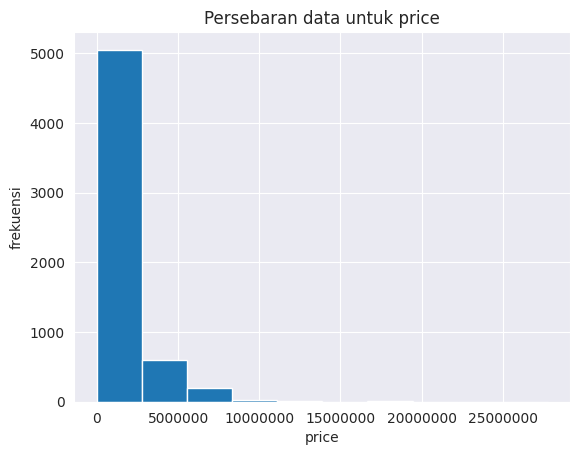

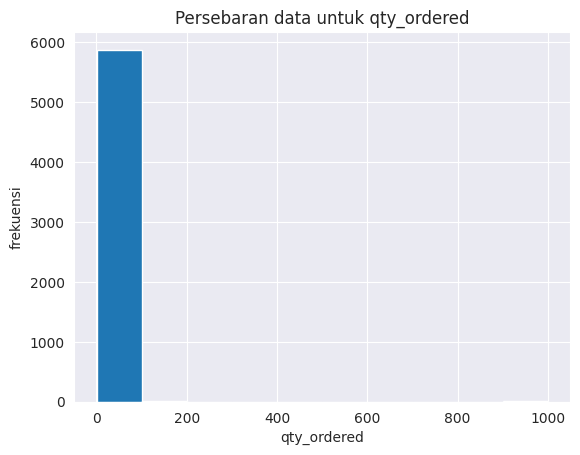

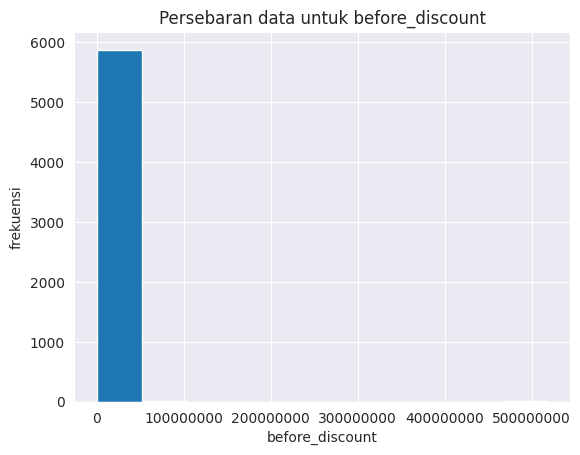

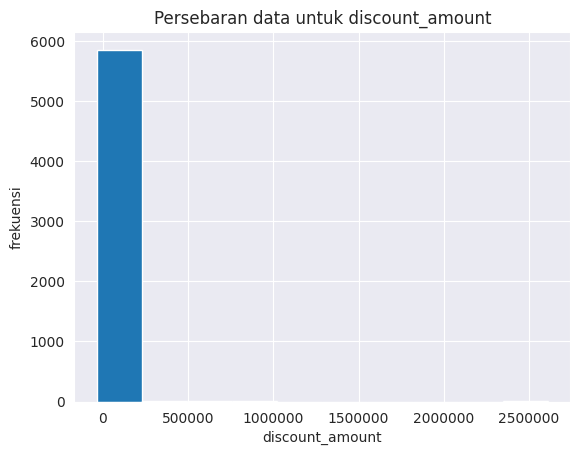

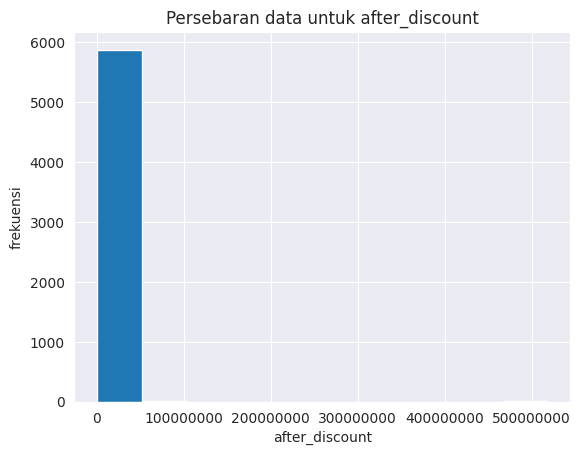

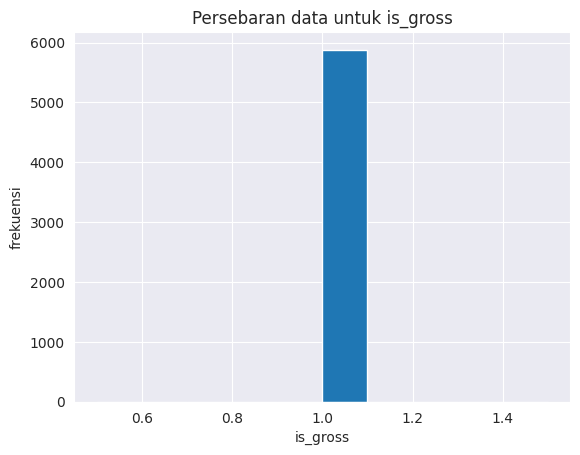

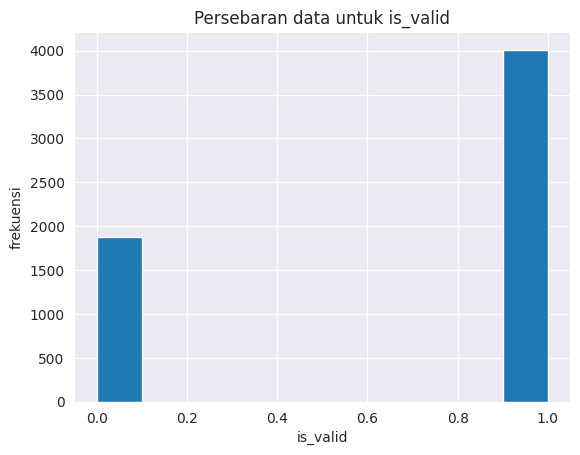

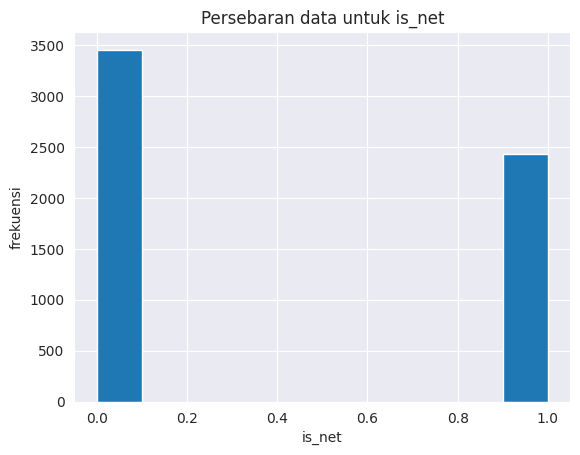

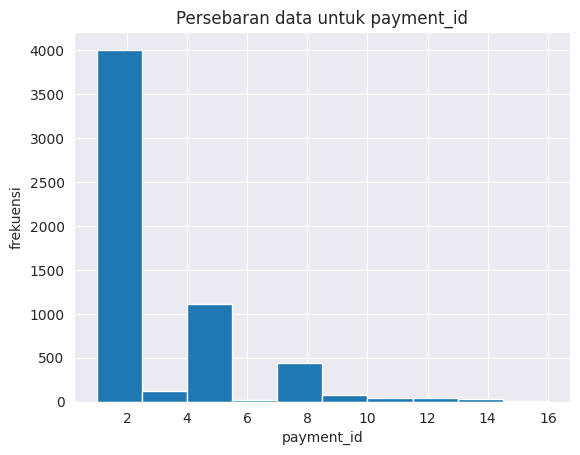

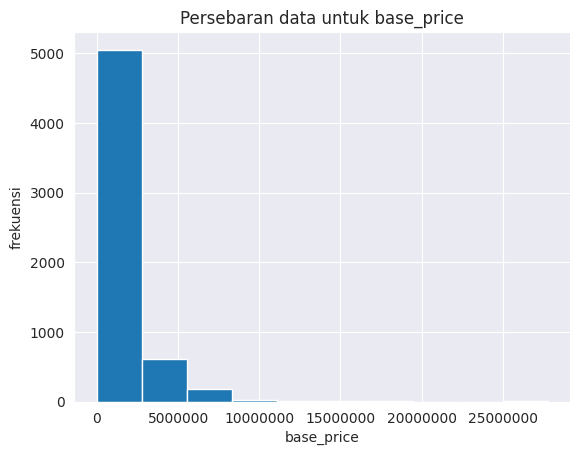

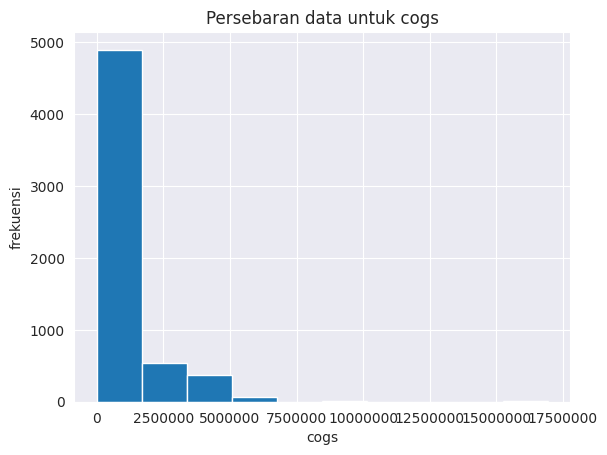

In [52]:
# cek persebaran int values
df_int = df.columns[df.dtypes=='int64']
for i in df_int:
  plt.hist(df[i])
  plt.title(f"Persebaran data untuk {i}")
  plt.xlabel(i)
  plt.ylabel('frekuensi')
  plt.ticklabel_format(style='plain', axis = 'x')
  plt.show()

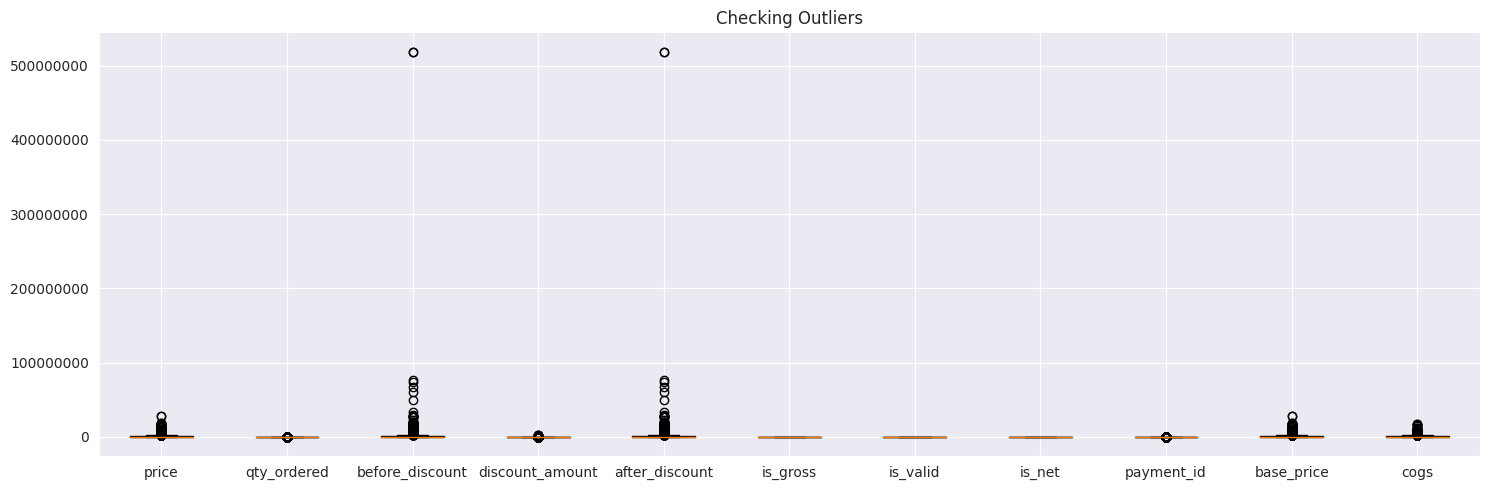

In [53]:
# cek rentang nilai integer
plt.figure(figsize=(15,5))
labels = list(df_int)
plt.boxplot([df[col] for col in df_int], labels=labels)
plt.ticklabel_format(style='plain', axis = 'y') #values ​​are not in scientific notation
plt.title('Checking Outliers')
plt.tight_layout();

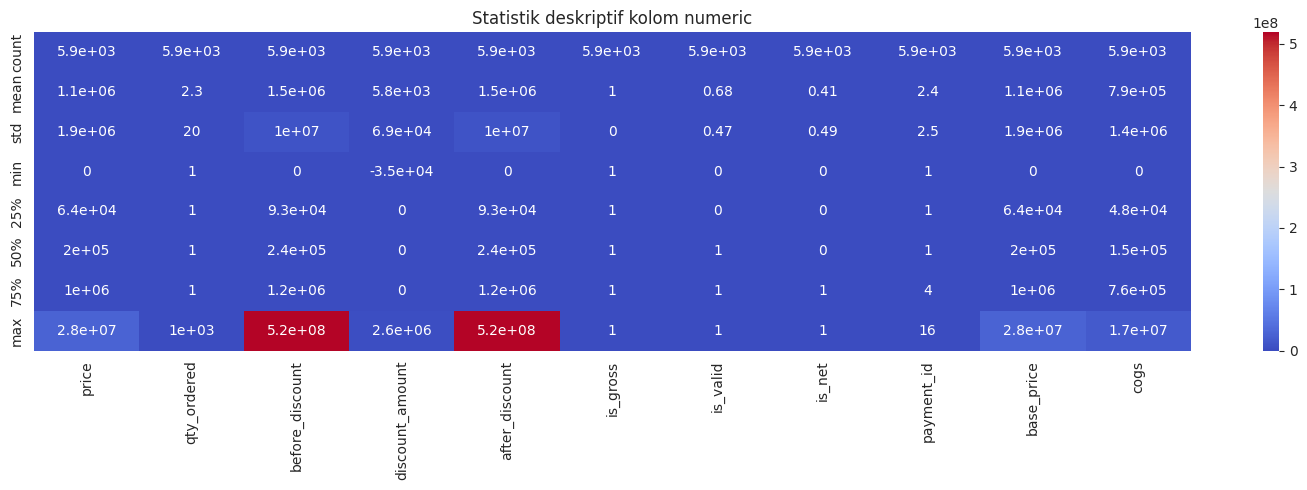

In [54]:
plt.figure(figsize=(15,5))
sns.heatmap(df.describe(), annot = True, cmap ='coolwarm')
plt.title('Statistik deskriptif kolom numeric')
plt.tight_layout();

In [55]:
df.describe()

,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id,base_price,cogs
count,5.884000e+03,5884.000000,5.884000e+03,5.884000e+03,5.884000e+03,5884.0,5884.000000,5884.000000,5884.000000,5.884000e+03,5.884000e+03
mean,1.062336e+06,2.304385,1.477429e+06,5.750228e+03,1.471679e+06,1.0,0.681849,0.413154,2.430829,1.055451e+06,7.920283e+05
std,1.929349e+06,19.828304,1.001996e+07,6.857852e+04,1.001861e+07,0.0,0.465798,0.492442,2.458386,1.925075e+06,1.430209e+06
min,0.000000e+00,1.000000,0.000000e+00,-3.477100e+04,0.000000e+00,1.0,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00
25%,6.351000e+04,1.000000,9.280000e+04,0.000000e+00,9.274200e+04,1.0,0.000000,0.000000,1.000000,6.351000e+04,4.750200e+04
50%,2.030000e+05,1.000000,2.445280e+05,0.000000e+00,2.436000e+05,1.0,1.000000,0.000000,1.000000,2.001000e+05,1.476100e+05
75%,1.017900e+06,1.000000,1.247000e+06,0.000000e+00,1.222785e+06,1.0,1.000000,1.000000,4.000000,1.009200e+06,7.586400e+05
max,2.778200e+07,1000.000000,5.187520e+08,2.610000e+06,5.187520e+08,1.0,1.000000,1.000000,16.000000,2.778200e+07,1.694702e+07


# Preprocessing

In [56]:
#mmebuat kolom untuk memisahkan tahun, bulan, tanggal, dan nama hari
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month
df['month_name'] = df['order_date'].dt.month_name()
df['day'] = df['order_date'].dt.day
df['day_name'] = df['order_date'].dt.day_name()
df.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,...,sku_name,base_price,cogs,category,registered_date,year,month,month_name,day,day_name
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000,2610000,2610000,1,...,RB_Dettol Germ Busting Kit-bf,26100,18270,Others,2021-07-07,2021,11,November,19,Friday
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710,2464927,7394782,1,...,PS4_Slim-500GB,1971942,1321182,Entertainment,2021-11-20,2021,11,November,19,Friday
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000,2065344,5416655,1,...,Changhong Ruba 55 Inches UD55D6000i Ultra HD T...,7482000,5162580,Entertainment,2021-11-19,2021,11,November,25,Thursday
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680,1455440,2138239,1,...,dawlance_Inverter 30,3593680,3054628,Appliances,2021-11-03,2021,11,November,22,Monday
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220,1059172,3354047,1,...,Dawlance_Inverter-45 2.0 ton,4413220,3177472,Appliances,2021-07-05,2021,11,November,21,Sunday


# EDA

## `No 1`
**Dear Data Analyst**,
<br></br>
Akhir tahun ini, perusahaan akan memberikan hadiah bagi pelanggan yang memenangkan kompetisi **Festival Akhir Tahun**. Tim Marketing membutuhkan bantuan untuk menentukan perkiraan hadiah yang akan diberikan pada pemenang kompetisi nantinya. Hadiah tersebut akan diambil dari **TOP 5 Produk** dari Kategori **Mobiles & Tablets** selama tahun 2022, dengan jumlah kuantitas penjualan (valid = 1) paling tinggi.

Mohon bantuan, untuk mengirimkan data tersebut sebelum akhir bulan ini ke Tim Marketing. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Marketing**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Memfilter data dengan valid = 1
2. Memfilter data dengan Category = Mobiles & Tablets
3. Memfilter data pada transaksi selama 2022
4. Gunakan groupby berdasarkan sku_name
5. Gunakan sort_values untuk mengurutkan data
6. Gunakan head untuk menampilkan top 5 produk


```



</details>

## `Jawaban No 1`

In [57]:
top_5_produk = df.query("(is_valid == 1) & (category == 'Mobiles & Tablets') & (year == 2022)").groupby('sku_name')['qty_ordered'].sum(
).sort_values(ascending = False).head(6).reset_index(name='sales_quantity')
top_5_produk

,sku_name,sales_quantity
0,IDROID_BALRX7-Gold,1000
1,IDROID_BALRX7-Jet black,31
2,Infinix Hot 4-Gold,15
3,samsung_Grand Prime Plus-Black,11
4,infinix_Zero 4-Grey,10
5,samsung_Grand Prime Plus-Silver,10


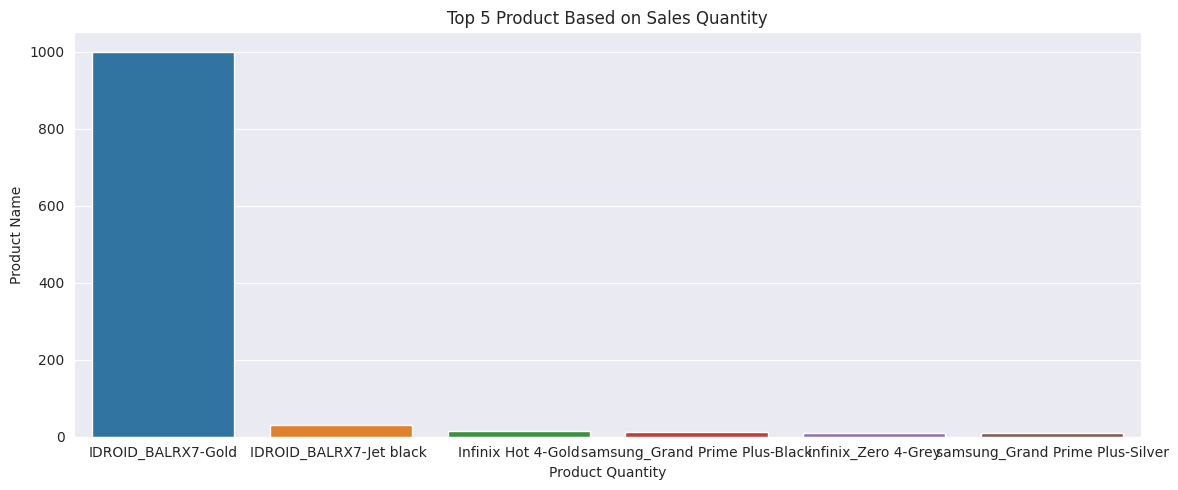

In [58]:
plt.figure(figsize=(12,5))
sns.barplot(data = top_5_produk, x = 'sku_name', y = 'sales_quantity')
plt.title('Top 5 Product Based on Sales Quantity')
plt.xlabel('Product Quantity')
plt.ylabel('Product Name')
plt.tight_layout();

## `No 2`
**Dear Data Analyst**,
<br></br>
Menindaklanjuti meeting gabungan Tim Werehouse dan Tim Marketing, kami menemukan bahwa ketersediaan stock produk dengan Kategori Others pada akhir 2022 kemarin masih banyak.
1. Kami mohon bantuan untuk melakukan pengecekan data penjualan kategori tersebut dengan tahun 2021 secara kuantitas penjualan. Dugaan sementara kami, telah terjadi penurunan kuantitas penjualan pada 2022 dibandingkan 2021. (Mohon juga menampilkan data ke-15 kategori)
<br></br>
2. Apabila memang terjadi penurunan kuantitas penjualan pada kategori Others, kami mohon bantuan untuk menyediakan data TOP 20 nama produk yang mengalami penurunan paling tinggi pada 2022 jika dibanding dengan 2021. Hal ini kami gunakan sebagai bahan diskusi pada meeting selanjutnya.  

Mohon bantuan untuk mengirimkan data tersebut paling lambat 4 hari dari hari ini. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Werehouse**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Memfilter data dengan valid = 1
2. Memfilter data pada transaksi selama 2021
3. Memfilter data pada transaksi selama 2022
4. Gunakan groupby berdasarkan sku_name masing-masing tahun
5. Menggabungkan kedua data dengan merge
6. Lakukan pengurangan kolom qty 2022 dengan qty 2021


```



</details>

## `Jawaban No 2.1`

In [59]:
df_2021_kategori = df.query("(is_valid == 1) & (year == 2021)").groupby(['category'])[['qty_ordered']].sum()
df_2022_kategori = df.query("(is_valid == 1) & (year == 2022)").groupby(['category'])[['qty_ordered']].sum()
df_penurunan = pd.merge(left = df_2021_kategori, right = df_2022_kategori, how = 'left', on = 'category', suffixes = ('_2021','_2022'))
df_penurunan['diff_quantity'] = df_penurunan['qty_ordered_2022'] - df_penurunan['qty_ordered_2021']
penurunan_kuantitas = df_penurunan.sort_values(by = 'diff_quantity', ascending = True)
penurunan_kuantitas

,qty_ordered_2021,qty_ordered_2022,diff_quantity
category,,,
Others,426,263,-163
Soghaat,759,612,-147
Men Fashion,237,175,-62
Beauty & Grooming,168,153,-15
Appliances,124,148,24
Books,171,195,24
Health & Sports,173,200,27
Computing,109,153,44
School & Education,184,237,53


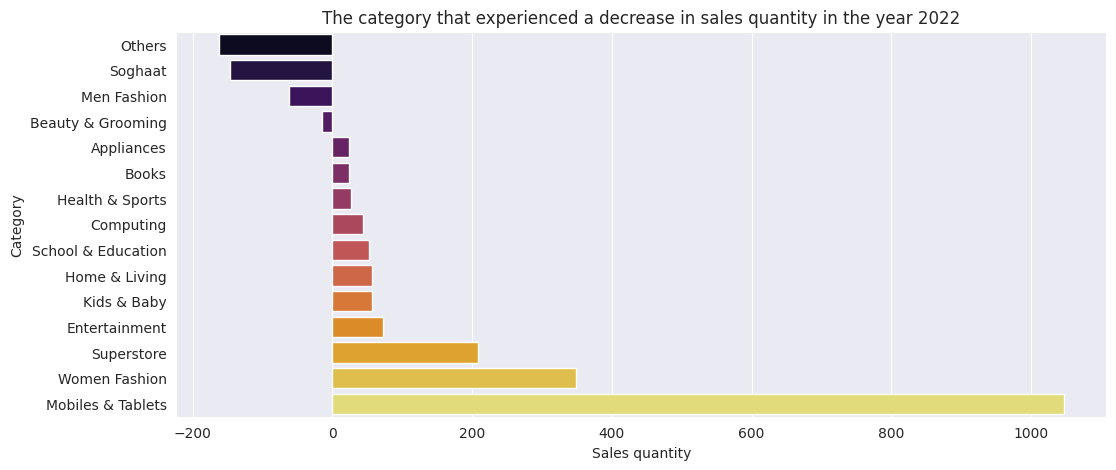

In [60]:
plt.figure(figsize = (12,5))
sns.barplot(data = penurunan_kuantitas.reset_index(), x = 'diff_quantity', y = 'category', palette = 'inferno')
plt.title('The category that experienced a decrease in sales quantity in the year 2022')
plt.xlabel('Sales quantity')
plt.ylabel('Category');

## `Jawaban No 2.2`

In [61]:
others_produk_2021 = df.query("(is_valid == 1) & (year == 2021) & (category == 'Others')").groupby(['sku_name'])[['qty_ordered']].sum(
).sort_values(by='qty_ordered', ascending = False)
others_produk_2022 = df.query("(is_valid == 1) & (year == 2022) & (category == 'Others')").groupby(['sku_name'])[['qty_ordered']].sum(
).sort_values(by='qty_ordered', ascending = False)
produk_others = pd.merge(left = others_produk_2021, right = others_produk_2022, how = 'outer', on = 'sku_name', suffixes = ('_2021','_2022')).fillna(0)
produk_others['decrease in product sales quantity'] = produk_others['qty_ordered_2022'] - produk_others['qty_ordered_2021']
penurunan_produk_others = produk_others.sort_values(by = 'decrease in product sales quantity', ascending = True).head(20)
penurunan_produk_others

,qty_ordered_2021,qty_ordered_2022,decrease in product sales quantity
sku_name,,,
RB_Dettol Germ Busting Kit-bf,200.0,45.0,-155.0
Dawlance_MD 10 + DWB 600,23.0,0.0,-23.0
Telemall_MM-DR-HB-L,23.0,2.0,-21.0
iu_Tickets General Enclosure-Islamabad,20.0,0.0,-20.0
RS_Rehmat-e-Shereen Mix Mithai,13.0,0.0,-13.0
kansai_NeverWet,10.0,1.0,-9.0
sindbad_Sindbad Gift Card-3,7.0,0.0,-7.0
emart_00-1,7.0,1.0,-6.0
Vouch 365 2016,5.0,0.0,-5.0


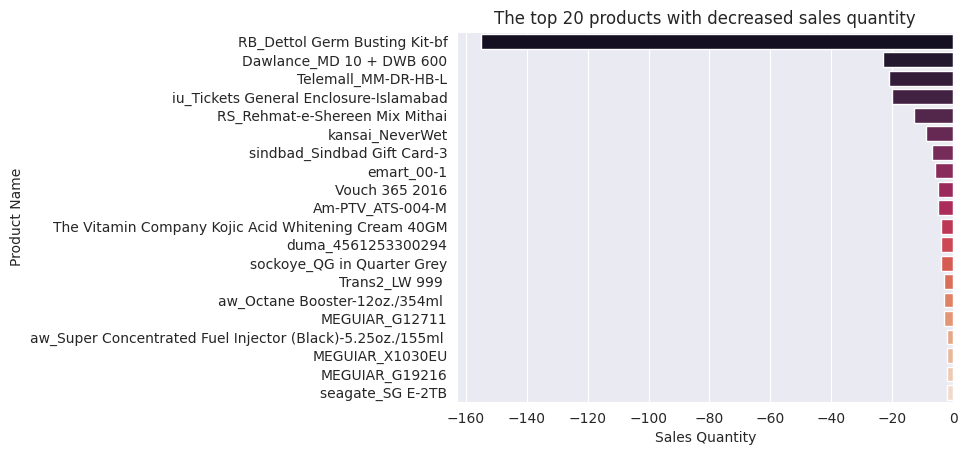

In [62]:
sns.barplot(data = penurunan_produk_others.reset_index(), x = 'decrease in product sales quantity', y = 'sku_name', palette = 'rocket')
plt.title('The top 20 products with decreased sales quantity')
plt.ylabel('Product Name')
plt.xlabel('Sales Quantity');

## `No 3`
**Dear Data Analyst**,
<br></br>
Terkait ulang tahun perusahaan pada 2 bulan mendatang, Tim Digital Marketing akan memberikan informasi promo bagi pelanggan pada akhir bulan ini. Kriteria pelanggan yang akan kami butuhkan adalah mereka yang sudah melakukan check-out namun belum melakukan pembayaran (is_gross = 1) selama tahun 2022. Data yang kami butuhkan adalah ID Customer dan Registered Date.

Mohon bantuan, untuk mengirimkan data tersebut sebelum akhir bulan ini ke Tim Digital Marketing. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Digital Marketing**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Memfilter data dengan gross = 1
2. Memfilter data dengan valid = 0
3. Memfilter data dengan net = 0
4. Memfilter data pada transaksi selama 2022


```



</details>

## `Jawaban No 3`

In [63]:
pending_payment_customers = df.query(
    "(is_gross == 1) & (year == 2022) & (is_valid == 0) & (is_net == 0)"
)[['customer_id','registered_date']].drop_duplicates()
pending_payment_customers

,customer_id,registered_date
9,C246762L,2022-05-08
18,C848774L,2021-11-07
19,C693415L,2022-04-12
21,C180595L,2022-04-22
22,C587425L,2022-03-22
...,...,...
5855,C653797L,2022-04-03
5856,C394076L,2021-10-12
5859,C248585L,2022-07-10
5865,C471304L,2022-05-13


In [64]:
#Export to csv
from google.colab import files
pending_payment_customers.to_csv('audience_list.csv', encoding = 'utf-8-sig',index=False)
files.download('audience_list.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## `No 4`
**Dear Data Analyst**,
<br></br>
Pada bulan October hingga Desember 2022, kami melakukan campaign setiap hari Sabtu dan Minggu. Kami hendak menilai, apakah campaign tersebut cukup berdampak pada kenaikan penjualan (before_discount). Mohon bantuan untuk menampilkan data:
1. Rata-rata harian penjualan weekends (Sabtu dan Minggu) vs rata-rata harian penjualan weekdays (Senin-Jumat) per bulan tersebut. Apakah ada peningkatan penjualan pada masing-masing bulan tersebut.
2. Rata-rata harian penjualan weekends (Sabtu dan Minggu) vs rata-rata harian penjualan weekdays (Senin-Jumat) keseluruhan 3 bulan tersebut.

Mohon bantuan untuk mengirimkan data tersebut paling lambat minggu depan. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Campaign**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Buatlah kolom baru untuk day, month, dan month number
2. Memfilter data dengan valid = 1
3. Memfilter data dengan day termasuk 'Saturday', 'Sunday' dengan menggunakan fungsi isin dan simpan dalam variable 'weekends'
4. Memfilter data dengan day termasuk 'Monday','Tuesday','Wednesday','Thusday','Friday' dengan menggunakan fungsi isin dan simpan dengan variabel 'weekday'
5. Memfilter data pada transaksi selama 2022 bulan Oktober sampai dengan Desember
6. Gunakan groupby berdasarkan pada masing-masing variabel
7. Menggabungkan kedua data dengan merge
8. Tampilkan pada grafik batang untuk melihat perbedaananya


```



</details>

## `Jawaban No 4.1`

In [72]:
weekend = ['Saturday', 'Sunday']
df_weekend = df.query("(day_name in @weekend) & (is_valid == 1) & (year == 2022) & (month.between(10,12))").groupby(
    ['month_name','order_date']
)['before_discount'].sum().round().reset_index(name='average_weekend_sales')
df_weekend = df_weekend.groupby(['month_name'])[['average_weekend_sales']].mean(

).sort_values(by='month_name', ascending = False) .round()
df_weekend

,average_weekend_sales
month_name,
October,5708341.0
November,5774045.0
December,4105994.0


In [73]:
weekdays= ['Monday','Tuesday','Wednesday','Thursday','Friday']
df_weekdays = df.query("(day_name in @weekdays) & (is_valid == 1) & (year == 2022) & (month.between(10,12))").groupby(
    ['month_name','order_date']
)['before_discount'].sum().round().reset_index(name='average_weekdays_sales')
df_weekdays = df_weekdays.groupby(['month_name'])[['average_weekdays_sales']].mean(

).sort_values(by='month_name', ascending = False) .round()
df_weekdays

,average_weekdays_sales
month_name,
October,7872212.0
November,6204666.0
December,8542530.0


In [74]:
df_campaign = pd.merge(left = df_weekdays, right = df_weekend, how = 'left', on = 'month_name')
df_campaign['diff'] = df_campaign['average_weekend_sales'] - df_campaign['average_weekdays_sales']
df_campaign['diff(%)'] = (
    ((df_campaign['average_weekend_sales'] - df_campaign['average_weekdays_sales'])/df_campaign['average_weekend_sales'])*100
).round(2).astype(str)+'%'
df_campaign = df_campaign.rename(columns = {'month_name':'month'})
df_campaign

,average_weekdays_sales,average_weekend_sales,diff,diff(%)
month_name,,,,
October,7872212.0,5708341.0,-2163871.0,-37.91%
November,6204666.0,5774045.0,-430621.0,-7.46%
December,8542530.0,4105994.0,-4436536.0,-108.05%


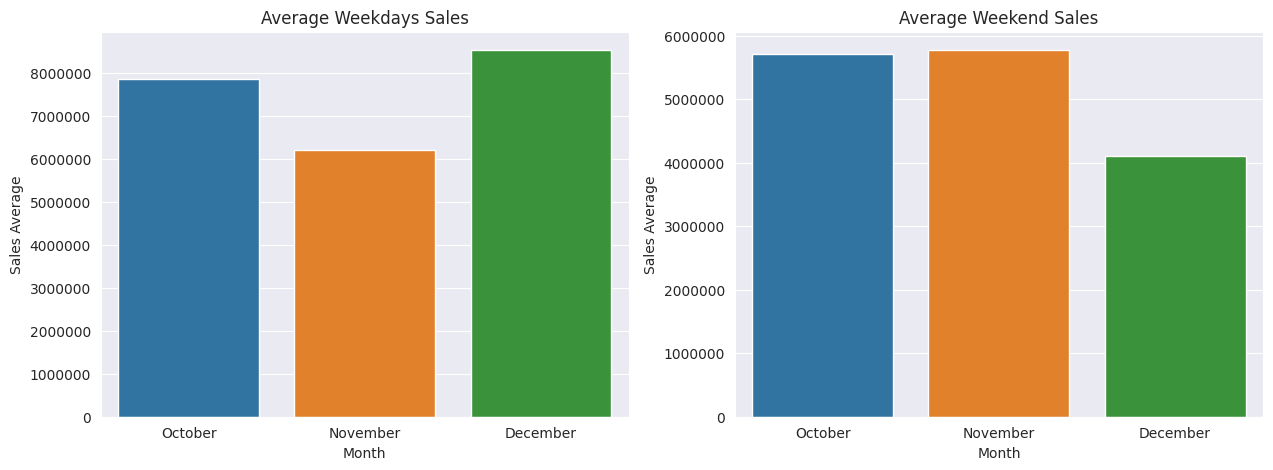

In [75]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(data = df_campaign.reset_index(),
            x = 'month_name', y = 'average_weekdays_sales')
plt.ticklabel_format(style='plain', axis = 'y') #values ​​are not in scientific notation
plt.title('Average Weekdays Sales')
plt.xlabel('Month')
plt.ylabel('Sales Average')

plt.subplot(1,2,2)
sns.barplot(data = df_campaign.reset_index(),
            x = 'month_name', y = 'average_weekend_sales')
plt.ticklabel_format(style='plain', axis = 'y') #values ​​are not in scientific notation
plt.title('Average Weekend Sales')
plt.xlabel('Month')
plt.ylabel('Sales Average')

plt.subplot(1,2,1);

''

<Figure size 1500x500 with 0 Axes>

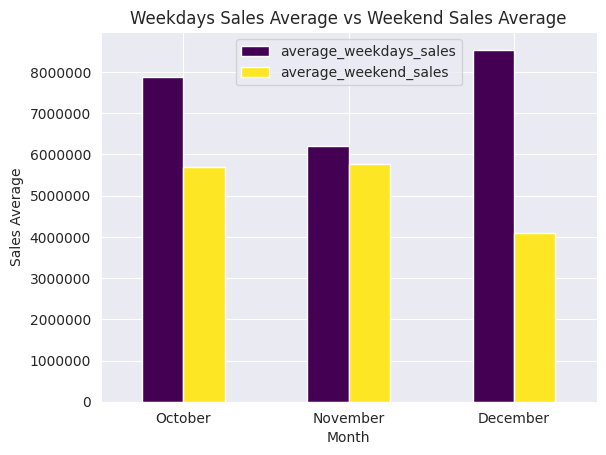

In [76]:
plt.figure(figsize=(15,5))
df_campaign[['average_weekdays_sales', 'average_weekend_sales']].plot(kind='bar', cmap = 'viridis')
plt.ticklabel_format(style='plain', axis = 'y') #values ​​are not in scientific notation
plt.title('Weekdays Sales Average vs Weekend Sales Average')
plt.xlabel('Month')
plt.ylabel('Sales Average')
plt.xticks(rotation=0)
;

## `Jawaban No 4.2`

In [77]:
df_weekdays = df.query(
    "(day_name in @weekdays) & (is_valid == 1) & (year == 2022) & (month.between(10,12))"
).groupby(['month_name','order_date'])['before_discount'].sum().round().reset_index(name='average_weekdays_sales')
df_weekdays_avg = df_weekdays[['average_weekdays_sales']].mean().round()
df_weekdays_avg

average_weekdays_sales    7520249.0
dtype: float64

In [78]:
df_weekend = df.query(
    "(day_name in @weekend) & (is_valid == 1) & (year == 2022) & (month.between(10,12))"
).groupby(['month_name','order_date'])['before_discount'].sum().round().reset_index(name='average_weekend_sales')
df_weekend_avg = df_weekend[['average_weekend_sales']].mean().round()
df_weekend_avg

average_weekend_sales    5269300.0
dtype: float64

In [79]:
q4 = pd.DataFrame({'Quarter 4 ':'3 month avg',
              ' Average Weekdays Sales ':[7520249.0],
              ' Average Weekend Sales ':[5269300.0],
              ' Diff ':[5269300.0-7520249.0],
              ' Diff (%)': [str(round((((5269300.0-7520249.0)/5269300.0)*100),2))+'%']})
q4.set_index('Quarter 4 ')

,Average Weekdays Sales,Average Weekend Sales,Diff,Diff (%)
Quarter 4,,,,
3 month avg,7520249.0,5269300.0,-2250949.0,-42.72%


In [80]:
q4 = pd.DataFrame({'weekdays_vs_weekend':['Weekdays','Weekend'],
                   'avg':[7520249.0,5269300.0	]})
q4

,weekdays_vs_weekend,avg
0,Weekdays,7520249.0
1,Weekend,5269300.0


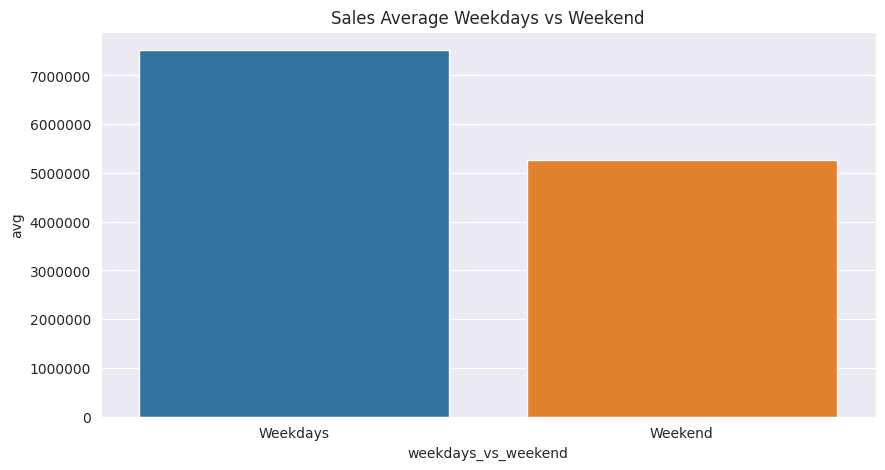

In [81]:
plt.figure(figsize=(10,5))
sns.barplot(data = q4, x = 'weekdays_vs_weekend', y = 'avg')
plt.ticklabel_format(style='plain', axis = 'y') #values ​​are not in scientific notation
plt.title('Sales Average Weekdays vs Weekend');